In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rcParams["figure.figsize"] =(20,10)

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [73]:
for column in df.columns:
    print(f"{column} : {df[column].nunique()} ")

area_type : 84 
availability : 81 
location : 1253 
size : 31 
society : 2688 
total_sqft : 2105 
bath : 19 
balcony : 4 
price : 1992 


#### 🚦Drop features that are not required to build our model

In [5]:
df1=df.drop(['area_type','society','balcony','availability'], axis='columns')

## ▶️ Data Cleaning: Handle NA values

In [6]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df1.isnull().sum()

location       81
size           96
total_sqft     80
bath          153
price          80
dtype: int64

In [8]:
df2=df1.dropna()
# we delete not remplace it cause it something depends on the criteria not a feature to juste estimate it 

In [9]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df2.shape

(13166, 5)

In [11]:
df2.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

## ▶️ Feature Engineering

#### 🚦 look for size feature 


In [74]:
df2['bedroom']=df2['size'].apply(lambda x: int(x.split(' ')[0]))
# take the first element separate it by space

C:\Users\asmae\AppData\Local\Temp\ipykernel_3144\983311676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bedroom']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [14]:
df2.head()

,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


#### 🚦 look for bedroom feature 


In [15]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13166 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13166 non-null  object 
 1   size        13166 non-null  object 
 2   total_sqft  13166 non-null  object 
 3   bath        13166 non-null  float64
 4   price       13166 non-null  float64
 5   bedroom     13166 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 720.0+ KB


In [17]:
def isfloat(x):
    try :
        float(x)
    except :
        return False
    return True    
        

In [18]:
df2[~df2['total_sqft'].apply(isfloat)].head(15)

,location,size,total_sqft,bath,price,bedroom
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [19]:
df2[~df2['total_sqft'].apply(isfloat)].shape

(190, 6)

In [20]:
def sqftToNum(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [21]:
df2['total_sqft']=df2['total_sqft'].apply(sqftToNum)
df2.head()

C:\Users\asmae\AppData\Local\Temp\ipykernel_3144\1804295095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft']=df2['total_sqft'].apply(sqftToNum)


,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [22]:
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bedroom               4
Name: 30, dtype: object

In [75]:
df2.drop('size',axis=1)

,location,total_sqft,bath,price,bedroom,pricePerSqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [23]:
df2['pricePerSqft'] = (df2['price']*100000)/df2['total_sqft']
df2.head()

C:\Users\asmae\AppData\Local\Temp\ipykernel_3144\1050664036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pricePerSqft'] = (df2['price']*100000)/df2['total_sqft']


,location,size,total_sqft,bath,price,bedroom,pricePerSqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


The ratio price / square_footage solves these problems by creating a new, comparable unit of measurement. 
It standardizes the price, allowing for an "apples-to-apples" comparison between properties of vastly different sizes and values.
$------------------------------------------------------------------------------$
The mansion has a price_per_sqft of $100 ($500,000 / 5000 sqft).

The studio has a price_per_sqft of $1000 ($500,000 / 500 sqft).

The rural house might be $125/sqft$, and the San Francisco house might be $1500/sqft$.

A machine learning model can immediately learn from this new feature:

"A high price_per_sqft indicates a premium, desirable, or overpriced property."

"A low price_per_sqft indicates a bargain, a less desirable area

In [24]:
df2['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [25]:
len(df2['location'].unique())

1252

In [26]:
# remove whitespace
df2.location = df2.location.apply(lambda x: x.strip())

C:\Users\asmae\AppData\Local\Temp\ipykernel_3144\1446732986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.location = df2.location.apply(lambda x: x.strip())


In [27]:
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                     535
Sarjapur  Road                 392
Electronic City                304
Kanakpura Road                 266
Thanisandra                    236
                              ... 
Kasthuri Nagar East Of NGEF      1
Kathriguppe IV Phase             1
Keerthi Layout                   1
Kenchanehalli R R Nagar          1
whitefiled                       1
Name: location, Length: 1241, dtype: int64

In [28]:
len(location_stats[location_stats <= 10] )

1000

## Dimensionality Reduction

In [29]:
location_stats_less_10=location_stats[location_stats <= 10]

In [30]:
# before
len(df2.location.unique())

1241

In [31]:
df3= df2.copy()
df3.location=df3.location.apply(lambda x: 'other' if x in location_stats_less_10 else x )
#after
len(df3.location.unique())

242

#### Any location having less than 10 data points should be tagged as "other" location. 

In [32]:
df3[df3.location == 'other']

,location,size,total_sqft,bath,price,bedroom,pricePerSqft
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804
18,other,3 BHK,2770.0,4.0,290.00,3,10469.314079
19,other,2 BHK,1100.0,2.0,48.00,2,4363.636364
25,other,3 BHK,1250.0,3.0,56.00,3,4480.000000
42,other,1 BHK,600.0,1.0,38.00,1,6333.333333
...,...,...,...,...,...,...,...
13291,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
13292,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
13302,other,2 BHK,1075.0,2.0,48.00,2,4465.116279
13306,other,4 Bedroom,1200.0,5.0,325.00,4,27083.333333


In [33]:
#let s consider that the threshold less than 300 sqft -- removed it 
df3[df3.total_sqft/df3.bedroom<300].head() 

,location,size,total_sqft,bath,price,bedroom,pricePerSqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [34]:
df3.shape

(13166, 7)

In [35]:
# remove outliers 
df4=df3[~(df3.total_sqft/df3.bedroom<300)]
df4.shape

(12425, 7)

In [36]:
df4.pricePerSqft.describe() 

count     12379.000000
mean       6306.710945
std        4171.014685
min         267.829813
25%        4205.978341
50%        5292.872265
75%        6916.666667
max      176470.588235
Name: pricePerSqft, dtype: float64

In [37]:
df4

,location,size,total_sqft,bath,price,bedroom,pricePerSqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [38]:
# Calculate mean for all numeric columns by location
numeric_mean = df4.groupby(['location']).mean(numeric_only=True)
print(numeric_mean)

                            total_sqft      bath       price   bedroom  \
location                                                                 
1st Block Jayanagar        1915.000000  3.100000  254.100000  3.200000   
1st Phase JP Nagar         1800.695652  2.958333  167.812500  2.875000   
2nd Phase Judicial Layout  1173.272727  2.090909   46.181818  2.454545   
2nd Stage Nagarbhavi       2127.777778  4.666667  270.111111  4.555556   
5th Block Hbr Layout       2112.571429  3.142857  125.428571  3.428571   
...                                ...       ...         ...       ...   
Yelahanka                  1776.041463  2.458537   84.137976  2.512195   
Yelahanka New Town         1215.526316  1.871795   87.294872  2.076923   
Yelenahalli                1268.461538  2.153846   50.799231  2.230769   
Yeshwanthpur               1454.343750  2.400000   97.079313  2.437500   
other                      1760.331715  2.708266  148.714852  2.798555   

                           pricePerSq

In [39]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.pricePerSqft)
        st = np.std(subdf.pricePerSqft)
        reduced_df = subdf[(subdf.pricePerSqft>(m-st)) & (subdf.pricePerSqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape
df5 

,location,size,total_sqft,bath,price,bedroom,pricePerSqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10164,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10165,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10166,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10167,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [40]:
df5['location'].values

array(['1st Block Jayanagar', '1st Block Jayanagar',
       '1st Block Jayanagar', ..., 'other', 'other', 'other'],
      dtype=object)

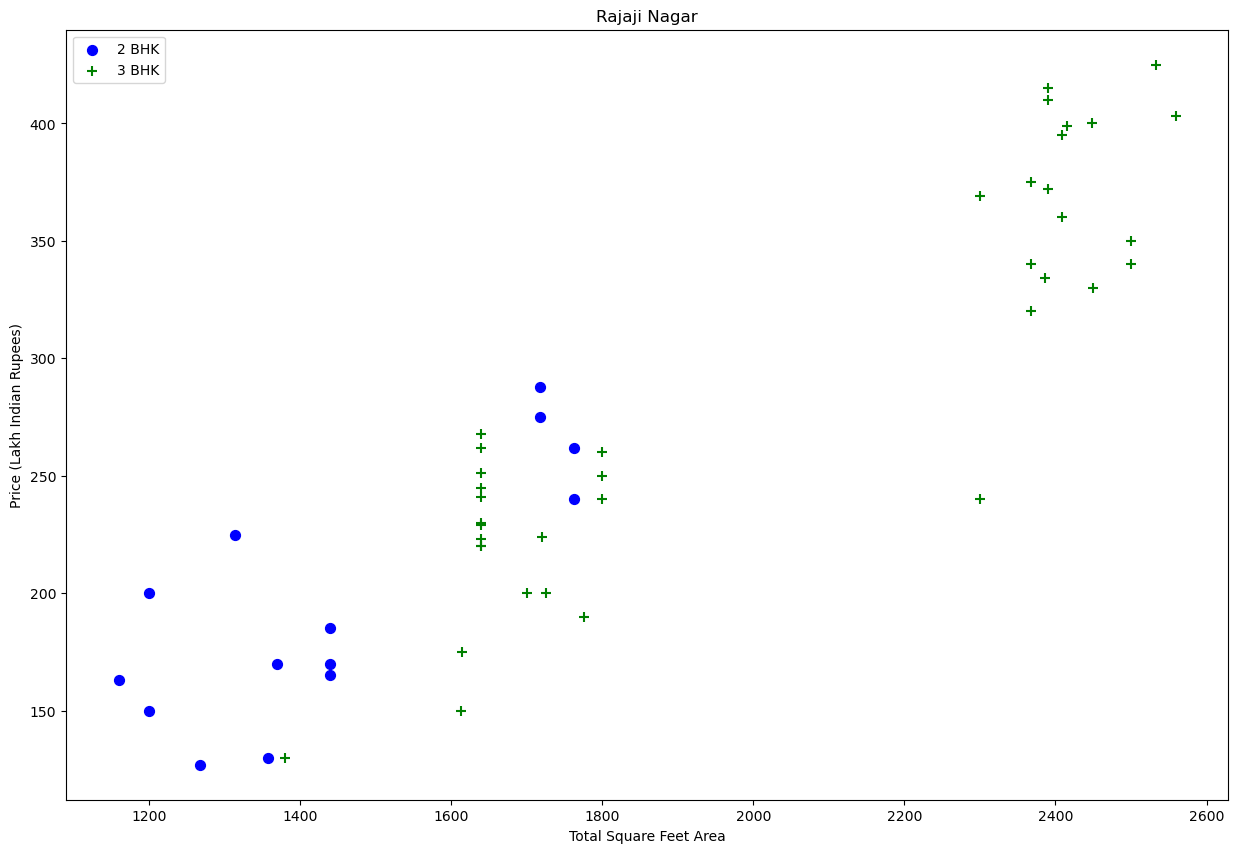

In [41]:
#Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bedroom==2)]
    bhk3 = df[(df.location==location) & (df.bedroom==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")


     - Removes unrealistic apartment prices by ensuring a larger apartment (e.g., 3BHK)
    is not cheaper per sqft than the average smaller apartment (e.g., 2BHK) in the same     location.
              
    - Args:
        df (pandas.DataFrame): The dataframe containing real estate data with columns: 'location', 'bhk', 'price_per_sqft'.

    - Returns:
        pandas.DataFrame: The cleaned dataframe with illogical outliers removed.
      

In [42]:
def remove_bhk_outliers(df):
 
    
    # Step 1: Initialize an empty array to store the index numbers of all rows to be removed.
    exclude_indices = np.array([])

    # Step 2: Process each location (neighborhood) one by one.
    for location, location_df in df.groupby('location'):
        
        # Step 3: Pre-calculate statistics (mean, std, count) for each BHK size within this location.
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedroom'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.pricePerSqft), # Average price per sqft for this BHK
                'std': np.std(bhk_df.pricePerSqft),   # Standard deviation of prices
                'count': bhk_df.shape[0]                # Number of apartments of this BHK size
            }

        # Step 4: The Core Logic - Find outliers by comparing to the next smaller size.
        for bhk, bhk_df in location_df.groupby('bedroom'):
            
            # TRICKY PART: Get the stats for the BHK size ONE SMALLER than the current one.
            # Example: If current group is 3BHK, this gets the stats for 2BHK.
            stats = bhk_stats.get(bhk-1)

            # Quality Check: Only proceed if the smaller BHK exists AND has enough data points to be reliable.
            if stats and stats['count'] > 5:
                
                # Find all apartments in the current group (e.g., 3BHK) that are priced
                # LOWER than the average price of the smaller BHK (e.g., 2BHK).
                too_cheap_apartments = bhk_df[bhk_df.pricePerSqft < (stats['mean'])]
                
                # TRICKY PART: Get the index values of these illogically cheap apartments
                # and add them to the master list of indices to remove.
                exclude_indices = np.append(exclude_indices, too_cheap_apartments.index.values)
    
    # Step 5: Return the original dataframe after dropping all the identified outlier rows.
    return df.drop(exclude_indices, axis='index')
df6=remove_bhk_outliers(df5)

In [43]:

df6.shape

(7285, 7)

In [44]:
df5.shape

(10169, 7)

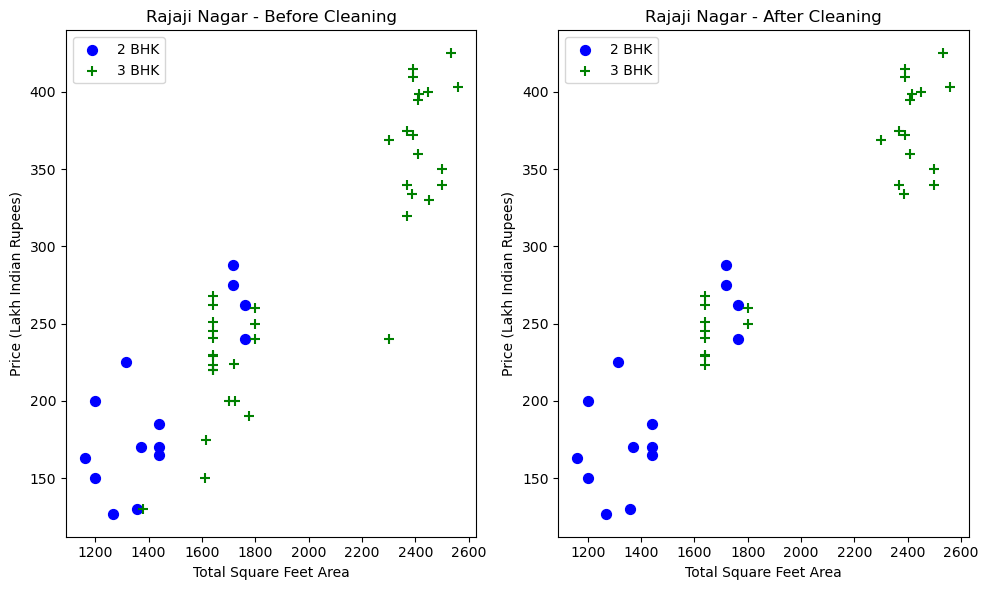

In [45]:
# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# First plot 
plt.sca(ax1)
plot_scatter_chart(df5, "Rajaji Nagar")
ax1.set_title("Rajaji Nagar - Before Cleaning")

# Second plot
plt.sca(ax2)
plot_scatter_chart(df6, "Rajaji Nagar")
ax2.set_title("Rajaji Nagar - After Cleaning")

plt.tight_layout()
plt.show()


### Before and after outlier removal:

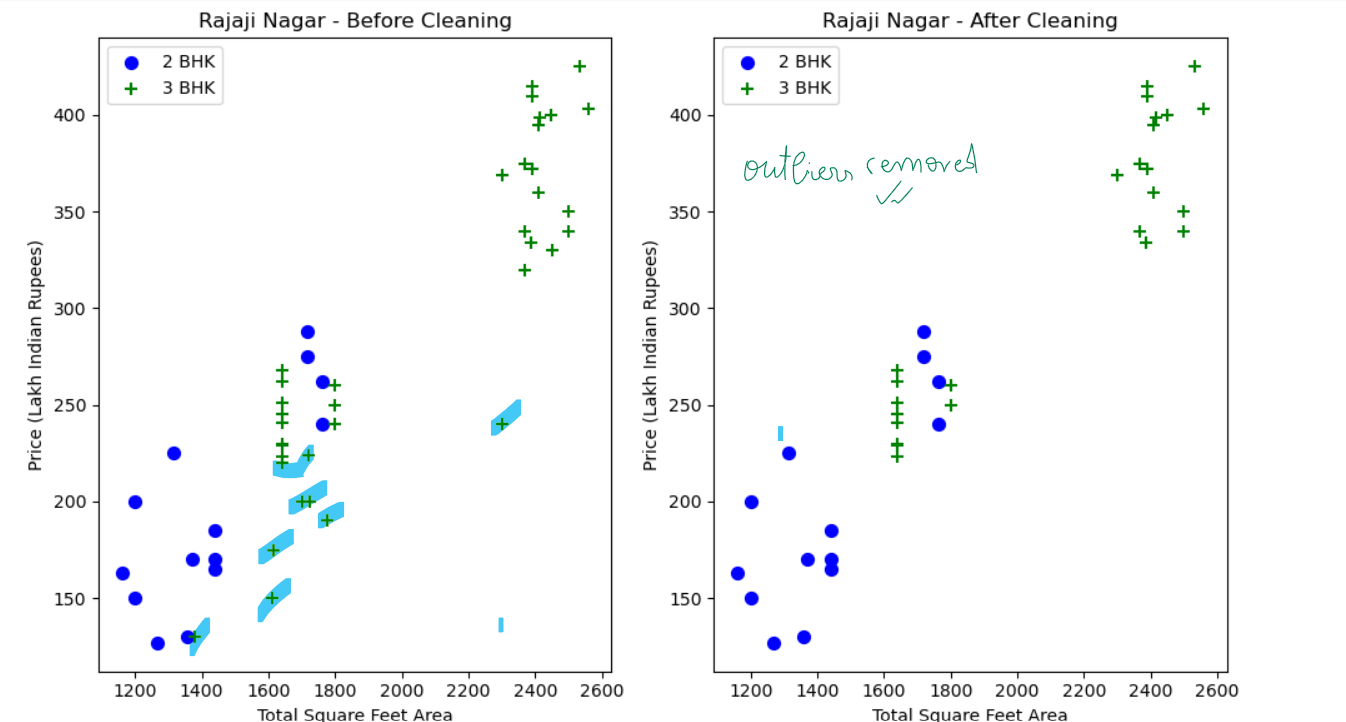

Text(0, 0.5, 'Count')

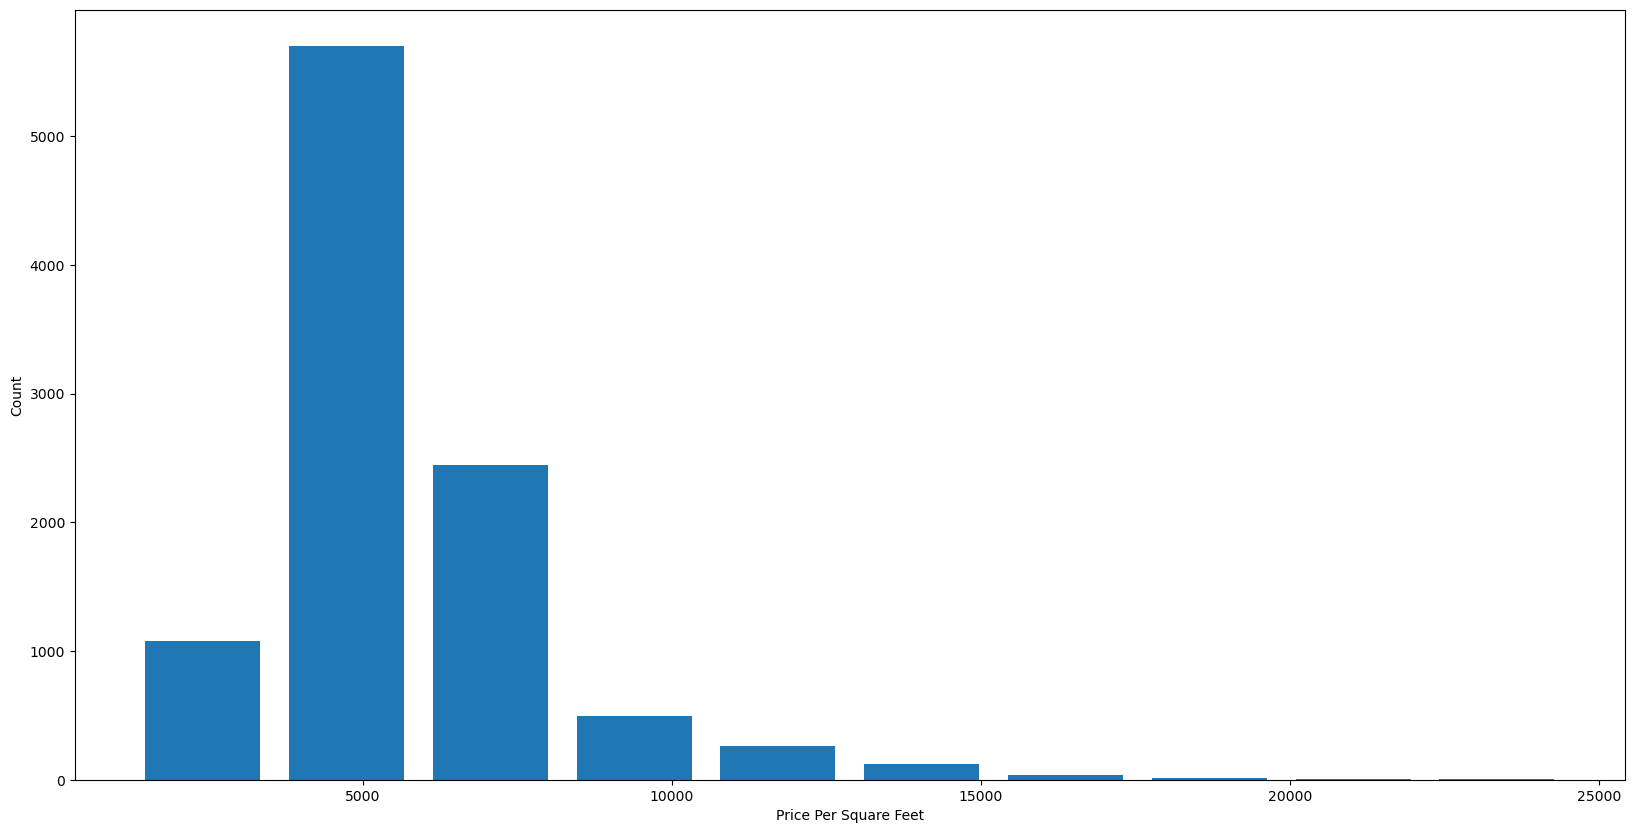

In [46]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df5.pricePerSqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Outliers removal - Bathrooms 

In [47]:

df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

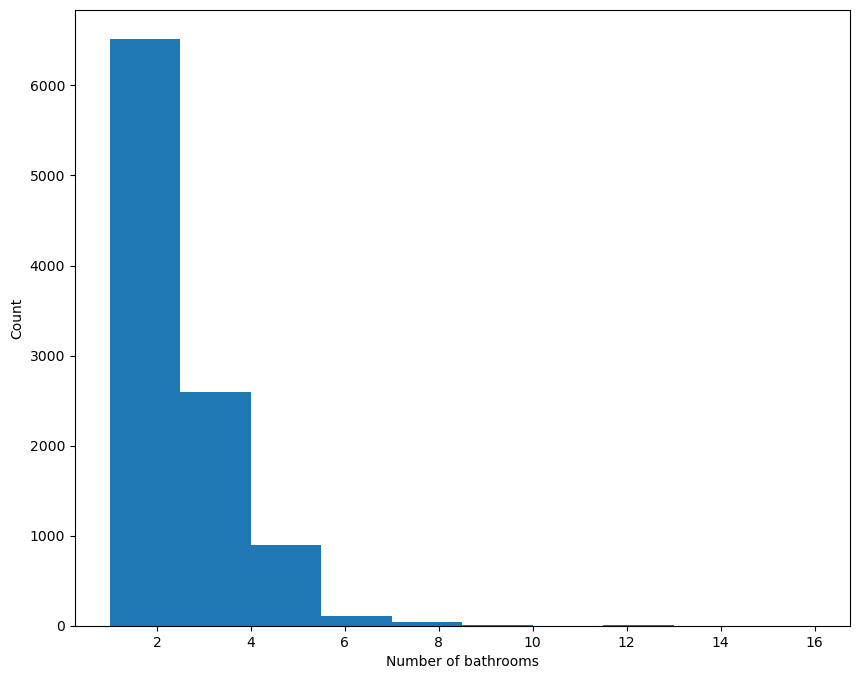

In [48]:
matplotlib.rcParams["figure.figsize"] = (10,8)
plt.hist(df5.bath)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [49]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,bedroom,pricePerSqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8469,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8555,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9266,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9589,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


##### ** have 2 more bathrooms than number of bedrooms in a home is unusual * *

In [50]:
df6[df6.bath>=df6.bedroom+2]

,location,size,total_sqft,bath,price,bedroom,pricePerSqft
36,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,451.0,6,15033.333333
37,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,450.0,6,18750.000000
530,Arekere,4 BHK,2710.0,6.0,142.0,4,5239.852399
580,BTM 2nd Stage,3 Bedroom,1260.0,5.0,185.0,3,14682.539683
813,Bannerghatta,4 BHK,3012.0,6.0,250.0,4,8300.132802
...,...,...,...,...,...,...,...
9852,other,4 BHK,6652.0,6.0,510.0,4,7666.867108
9969,other,2 BHK,600.0,4.0,70.0,2,11666.666667
10021,other,3 Bedroom,5656.0,5.0,499.0,3,8822.489392
10131,other,4 BHK,6652.0,6.0,660.0,4,9921.828022


##### -- Saying that the business manager has a conversation with you that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max.
        Anything above that is an outlier or a data error and can be removed

In [51]:
df7=df6[~(df6.bath>=df6.bedroom+2)]
df7.head() 

,location,size,total_sqft,bath,price,bedroom,pricePerSqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


## Model 

In [52]:
df8=df7.drop('size', axis='columns')
df8.head()

,location,total_sqft,bath,price,bedroom,pricePerSqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [53]:
# encoding -- location column
dummies=pd.get_dummies(df8.location)
dummies.head() 

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
df9=pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')
# Drop the last column in dummies (if all locations are 0 then the 1 is with the last 'other' )

In [55]:
df9.head()

,location,total_sqft,bath,price,bedroom,pricePerSqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
df10=df9.drop('location',axis='columns')

In [57]:
df10.shape

(7207, 246)

In [58]:
#features
x=df10.drop(['price','pricePerSqft'],axis='columns')
x.head()

,total_sqft,bath,bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
y=df10.price
y.head()


0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
Xtr,Xtst,ytr,ytst=train_test_split(x,y,test_size=0.2,random_state=10)

Text(0, 0.5, 'price')

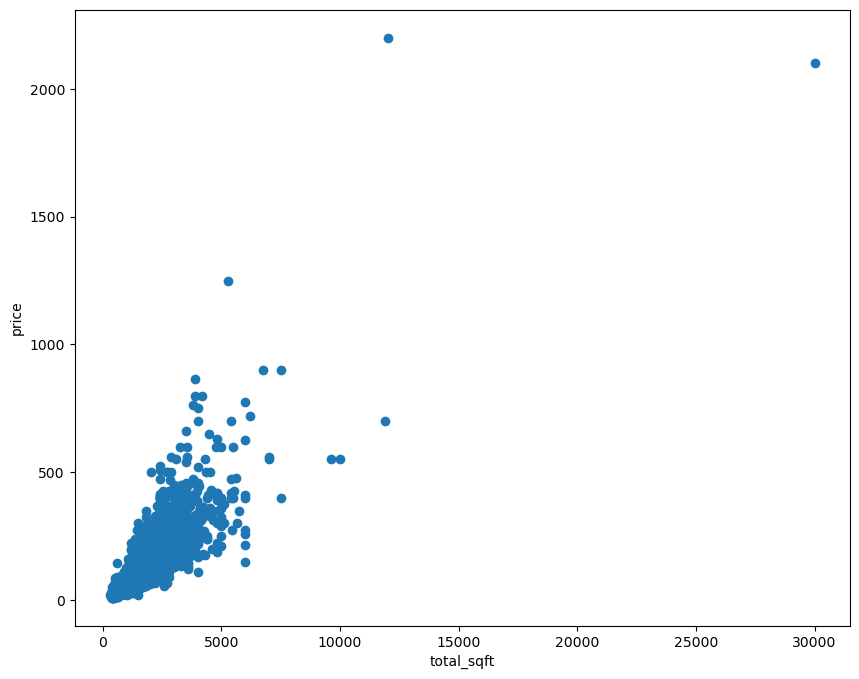

In [61]:
import matplotlib.pyplot as plt
plt.scatter(df10['total_sqft'],df10['price'])
plt.xlabel("total_sqft")
plt.ylabel("price")

Text(0, 0.5, 'price')

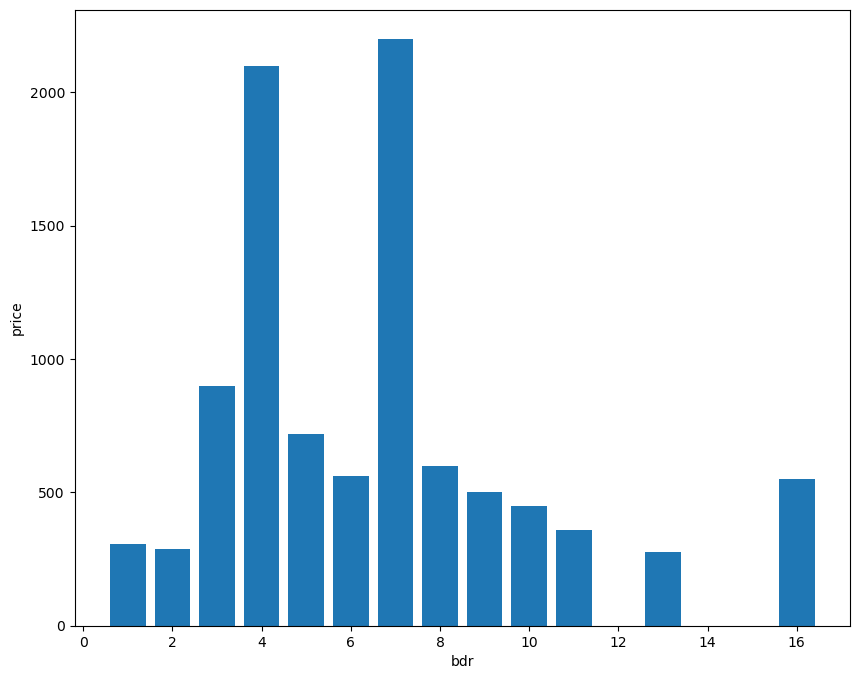

In [62]:

plt.bar(df10['bedroom'],df10['price'])
plt.xlabel("bdr")
plt.ylabel("price")

In [63]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(Xtr,ytr)
model.score(Xtst,ytst)

0.8552154693026238

In [64]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=4)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.87969374, 0.87137335, 0.8789408 , 0.88831177, 0.86592714])

In [65]:

# chossing the best model with best params
from sklearn.model_selection import GridSearchCV
# gridsearch
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model(x,y):
    algorithm ={
        'linear_regression' :{
            'model':LinearRegression(),
            'params':{
                 'fit_intercept': [True]
            }
        },
         'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores=[]
    cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algorithm.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(x,y)

C:\Users\asmae\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\asmae\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asmae\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\asmae\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\asmae\anaconda3\Lib\site-packages\

,model,best_score,best_params
0,linear_regression,0.845559,{'fit_intercept': True}
1,lasso,0.737994,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.786957,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


#####  **we can say that LinearRegression gives the best score**

In [66]:

x.columns

Index(['total_sqft', 'bath', 'bedroom', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [67]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return model.predict([X])[0]
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\asmae\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.27858471300324

In [68]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\asmae\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


176.68311745147554

In [69]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as file:
    pickle.dump(model,file)

In [70]:
# the columns needed for prediction model
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))